In [1]:
from asynch import *
import tensorflow as tf
from utils import create_session_config
from models.utils import corr
import numpy as np
import tensorflow_probability as tp
FLAGS.per_process_gpu_memory_fraction=0.01
from data.registry import etf2d
from models.nn_pdf_common import transform_x, create_cdf_layer_partial_monotonic_MLP, create_pdf_layer_mv
from models.utils import extract_xy, metric_loglikelihood, train_op, constrain_cdf, print_tensor
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

/home/pawel/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/pawel/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/pawel/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/pawel/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/pawel/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/pawel/tensorflow/lib/python3.5/importli

In [13]:


def run(x_data,y_data): 
    x=tf.placeholder(shape=(None,1),dtype=tf.float32)
    y=tf.placeholder(shape=(None,1),dtype=tf.float32)
    
    z = tf.square(x) + tf.square(y) 
#     g = tf.gradients(tf.gradients(z, x)[0],y)[0]
    
    with tf.Session(config=create_session_config()) as sess:
        sess.run(tf.global_variables_initializer())
        return sess.run([z], feed_dict={x:x_data,y:y_data})

def invoke_for_mesh(centre,  delta, points, fun):
    x = np.linspace(centre[0]-delta,centre[0]+delta,points)
    y = np.linspace(centre[1]-delta,centre[1]+delta,points)
    
    grid = np.meshgrid(x,y)

    grid_flat = np.concatenate(list(map(lambda a: a.reshape(-1,1), grid)), axis=1)
    
    res = invoke_in_process_pool(1, Callable(run, x_data=grid_flat[:,0].reshape(-1,1) , y_data=grid_flat[:,1].reshape(-1,1)))[0]
    
    return fun(grid, grid_flat, res)

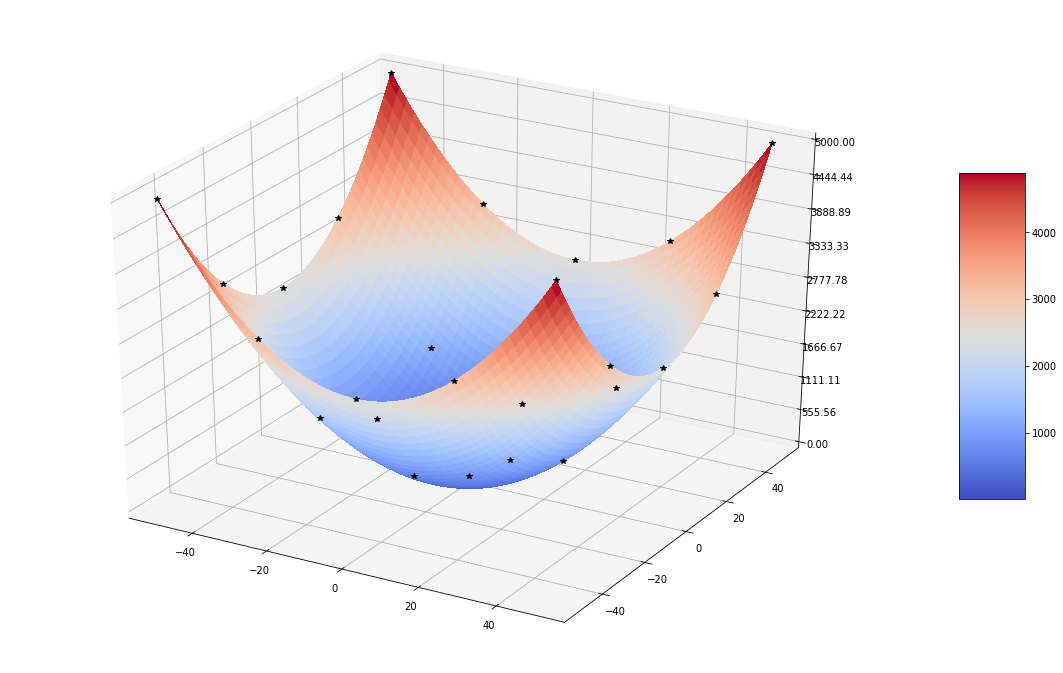

In [16]:
fig = plt.figure(figsize=(20,12))
ax = fig.gca(projection='3d')

delta=50.0
centre_idx=0
surf = invoke_for_mesh([0,0], delta=delta,points=100, 
                       fun=lambda y_grid, y_grid_flat, res: ax.plot_surface(y_grid[0],y_grid[1],res[0].reshape(100,100),cmap=cm.coolwarm, linewidth=0, antialiased=False))

invoke_for_mesh([0,0], delta=delta,points=5,
                fun=lambda y_grid, y_grid_flat, res: ax.plot(y_grid[0].flatten(), y_grid[1].flatten(), res[0].flatten(), "*",color="black"))

# def print_vals(y_grid, y_grid_flat, res):
#     for y1,y2,cdf,pdf in zip(y_grid[0].flatten(),y_grid[1].flatten(), res[0].flatten(), res[1].flatten()):
#         ax.text(y1, y2, cdf, '%.2E'%pdf, color='black' if pdf >= 0 else "red")

# invoke_for_mesh([0,0], delta=delta,points=8,fun= print_vals)

# Customize the z axis.
# ax.set_zlim(0.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# ax.view_init(10, 180)

plt.show()


In [176]:
y_centre=data_loader.train_y[np.newaxis,y_point,:]

idx=np.argmin(np.power(np.sum(np.power(y_grid_flat -y_centre ,2),axis=1),0.5))
y_grid_flat[idx,:]
y_centre

res[idx,:]
res_centre


array([0.98873143, 0.82598441])

array([[0.99077225, 0.8280252 ]], dtype=float32)

array([ 9.956592e-01, -2.383794e-05], dtype=float32)

array([[ 1.0000000e+00, -2.4043573e-05]], dtype=float32)

In [116]:
y_centre_1
y_centre_2
res_centre

0.99077225

0.8280252

array([[ 1.0000000e+00, -2.4043573e-05]], dtype=float32)

In [117]:
y_grid_flat

array([[-19.00922775, -19.17197478],
       [-18.19290122, -19.17197478],
       [-17.37657469, -19.17197478],
       ...,
       [ 19.35811919,  20.82802522],
       [ 20.17444572,  20.82802522],
       [ 20.99077225,  20.82802522]])

In [131]:
res[:,0].reshape(points,points)

array([[0.0494892 , 0.05248304, 0.05563565, ..., 0.5205302 , 0.53551227,
        0.5502098 ],
       [0.05229415, 0.05538378, 0.058638  , ..., 0.5346875 , 0.54963666,
        0.56427145],
       [0.05524927, 0.05844036, 0.06180247, ..., 0.5490528 , 0.56393874,
        0.57848126],
       ...,
       [0.4852726 , 0.5000317 , 0.515087  , ..., 0.9882231 , 0.99146134,
        0.994536  ],
       [0.49958614, 0.5143923 , 0.529463  , ..., 0.9912249 , 0.9943612 ,
        0.99733984],
       [0.5137107 , 0.5285332 , 0.54358846, ..., 0.9940721 , 0.99711215,
        1.        ]], dtype=float32)